In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
# adfuler checks if data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller

# ARIMA function for model building
from statsmodels.tsa.arima.model import ARIMA
# for calculating RMSE error
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_excel('CocaCola.xlsx',index_col='Quarter',parse_dates=True)
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [66]:
df.shape

(42, 1)

In [67]:
df.dropna(inplace=True)
df.shape

(42, 1)

<AxesSubplot: xlabel='Quarter'>

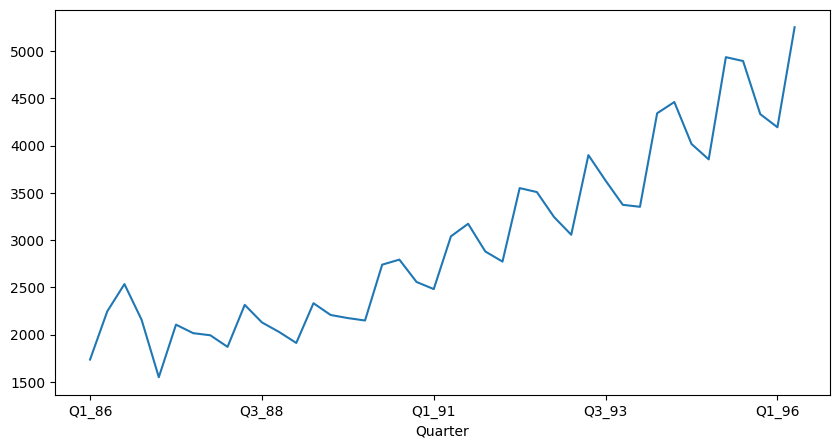

In [68]:
df['Sales'].plot(figsize=(10,5))

### Check if data is stationary or non-stationary
##### p>0.05 : non-stationary
##### p<0.05 : stationary

In [69]:
def ad_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("p-value: ",dftest[1])

ad_test(df['Sales'])

p-value:  0.9966611673930905


### ARIMA model for time series forecasting
#### ARIMA (autoregressive integrated moving average model). 
#### ARIMA is specified by 3 order parameters: (p,d,q)
#### AR(p) : autoregression,  I(d) : Integration,  MA(q) : Moving Average
#### Types of ARIMA Model:
#### ARIMA : Non-seasonal Autoregressive Integrated Moving Averages
#### SARIMA : Seasonal ARIMA
#### SARIMAX : Seasonal ARIMA with exogenous variables

In [70]:
# from auto_arima we get odrer of p,d,q
from pmdarima import auto_arima

In [71]:
stepwise_fit = auto_arima(df['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=407.084, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=406.443, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=406.440, Time=0.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=404.444, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=404.445, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=405.084, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=403.610, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 2.459 seconds


In [72]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -200.223
Date:                            Tue, 18 Apr 2023   AIC                            402.446
Time:                                    14:50:05   BIC                            403.813
Sample:                                         0   HQIC                           402.874
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.813e+04   1.67e+04      3.472      0.001    2.53e+04    9.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.88   Prob(JB):                         0.76
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split the data

In [73]:
train = df.iloc[:-5]
test = df.iloc[-5:]

In [74]:
print(f'train: {train.shape}')
print(f'test: {test.shape}')

train: (37, 1)
test: (5, 1)


### Create and fit ARIMA model

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima_model = SARIMAX(train['Sales'], 
                order = (0, 1, 0), 
                seasonal_order =(0, 1, 0, 12))
  
arima_model = arima_model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   37
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -166.211
Date:                            Tue, 18 Apr 2023   AIC                            334.422
Time:                                    14:50:54   BIC                            335.600
Sample:                                         0   HQIC                           334.735
                                             - 37                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.063e+04   1.87e+04      3.236      0.001    2.39e+04    9.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.94   Prob(JB):                         0.72
Heteroskedasticity (H):               0.54   Skew:                             0.33
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
start = len(train)
print(start)
end = len(train)+len(test)-1
print(end)

37
41


In [77]:
pred = arima_model.predict(start=start,end=end)
pred.index = df.index[start:end+1]
pred

Quarter
Q2_95    4632.000000
Q3_95    4590.000000
Q4_95    4325.859993
Q1_96    4138.000000
Q2_96    4981.000000
Name: predicted_mean, dtype: float64

<AxesSubplot: xlabel='Quarter'>

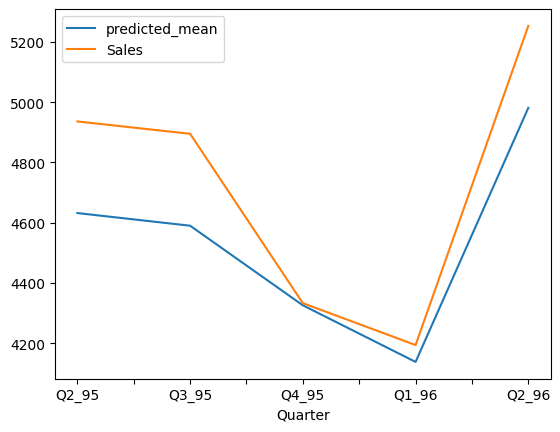

In [78]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [79]:
test['Sales'].mean()

4722.2

In [80]:
from math import sqrt
test['Sales'].mean()
rmse = sqrt(mean_squared_error(pred,test['Sales']))
print(f"rmse: {rmse}")

rmse: 229.1776514847083
